# Import the library



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("playstore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df.shape

(10841, 13)

# 1. Data clean up – Missing value treatment

__a. Drop records where rating is missing since rating is our target/study variable__

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

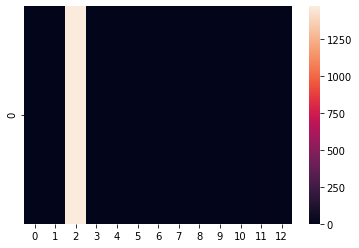

In [8]:
sns.heatmap([df.isnull().sum()])

In [9]:
len(df)

10841

In [10]:
df.dropna(subset=['Rating'],inplace=True)

In [11]:
len(df)

9367

__b. Check the null values for the Android Ver column.__

In [12]:
df['Android Ver'].isnull().sum()

3

In [13]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
df[df["App"] == "Life Made WI-Fi Touchscreen Photo Frame"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


__ii. Drop the 3rd record i.e. record for “Life Made WIFI …”__

In [15]:
df.drop(df[df["App"] == "Life Made WI-Fi Touchscreen Photo Frame"].index,inplace=True)

In [16]:
len(df)

9366

In [17]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

__iii. Replace remaining missing values with the mode__

In [18]:
df["Android Ver"].fillna(df["Android Ver"].mode()[0],inplace=True)

In [19]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

__c. Current ver – replace with most common value__

In [20]:
df["Current Ver"].fillna(df["Current Ver"].mode()[0],inplace=True)

In [21]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 2. Data clean up – correcting the data types

__a. Which all variables need to be brought to numeric types?__

__b. Price variable – remove $ sign and convert to float__

In [22]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null object
Size              9366 non-null float64
Installs          9366 non-null object
Type              9366 non-null object
Price             9366 non-null object
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null object
Current Ver       9366 non-null object
Android Ver       9366 non-null object
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [24]:
df["Price"].dtype

dtype('O')

In [25]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [26]:
df["Price"] = df["Price"].str.replace("$","")

In [27]:
df["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [28]:
df["Price"] = df["Price"].astype('float')

In [29]:
df["Price"].dtype

dtype('float64')

__c. Installs – remove ‘,’ and ‘+’ sign, convert to integer__

In [30]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [31]:
df["Installs"] = df["Installs"].str.replace(",","")
df["Installs"] = df["Installs"].str.replace("+","")

In [32]:
df["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '100', '500', '10', '5', '50', '1'], dtype=object)

In [33]:
df["Installs"] = df["Installs"].astype('int')

In [34]:
df["Installs"].dtype

dtype('int32')

__d. Convert all other identified columns to numeric__

In [35]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null object
Size              9366 non-null float64
Installs          9366 non-null int32
Type              9366 non-null object
Price             9366 non-null float64
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null object
Current Ver       9366 non-null object
Android Ver       9366 non-null object
dtypes: float64(3), int32(1), object(9)
memory usage: 987.8+ KB


In [37]:
df["Reviews"] = df["Reviews"].astype("int")
df["Current Ver"] = df["Current Ver"].astype("str")
df["Android Ver"] = df["Android Ver"].astype("str")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null int32
Size              9366 non-null float64
Installs          9366 non-null int32
Type              9366 non-null object
Price             9366 non-null float64
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null object
Current Ver       9366 non-null object
Android Ver       9366 non-null object
dtypes: float64(3), int32(2), object(8)
memory usage: 951.2+ KB


# 3. Sanity checks – check for the following and handle accordingly

__a. Avg. rating should be between 1 and 5, as only these values are allowed on the play
store.
  i. Are there any such records? Drop if so__


In [39]:
df["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [40]:
df["Rating"].mean()

4.191757420456978

In [41]:
df[(df["Rating"] > 5) & (df["Rating"] < 1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [42]:
df[df["Reviews"] > df["Installs"]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [43]:
len(df)

9366

__b. Reviews should not be more than installs as only those who installed can review the
app.
i. Are there any such records? Drop if so.__

In [44]:
df.drop(df[df["Reviews"] > df["Installs"]].index,inplace=True)

In [45]:
len(df)

9359

In [46]:
df[df["Reviews"] > df["Installs"]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 4. Identify and handle outliers.

__a. Price column__
__i. Make suitable plot to identify outliers in price__

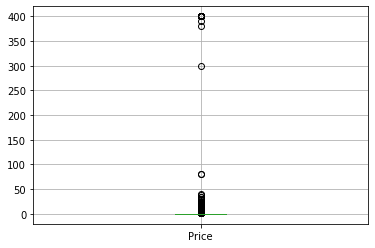

In [47]:
df.boxplot(['Price'])

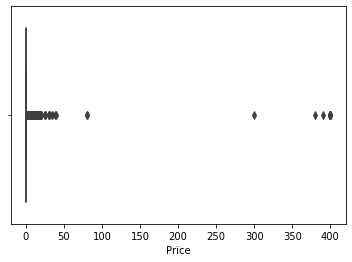

In [48]:
sns.boxplot(df['Price'])

(array([9.342e+03, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.400e+01]),
 array([  0.,  40.,  80., 120., 160., 200., 240., 280., 320., 360., 400.]),
 <a list of 10 Patch objects>)

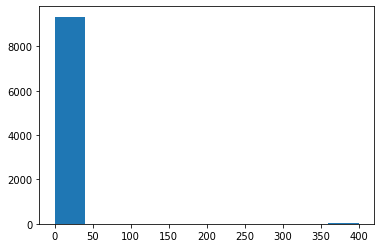

In [49]:
plt.hist(df["Price"])

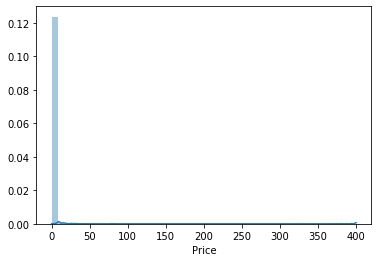

In [50]:
sns.distplot(df['Price'])

In [51]:
df["Price"].value_counts()

0.00      8715
2.99       114
0.99       106
4.99        70
1.99        59
          ... 
299.99       1
1.59         1
1.61         1
3.90         1
2.90         1
Name: Price, Length: 73, dtype: int64

In [52]:
df[df["Price"] > 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up


In [53]:
df.drop(df[df["Price"] > 30].index,inplace=True)

In [54]:
len(df)

9338

In [55]:
df[df["Price"] > 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


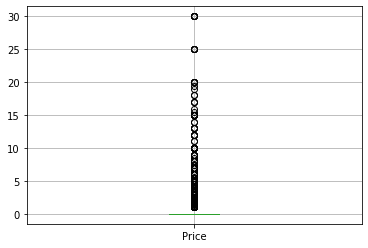

In [56]:
df.boxplot(['Price'])

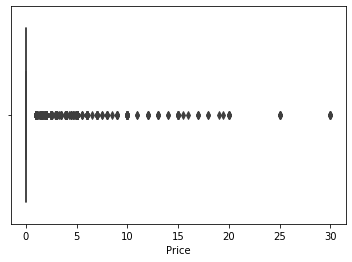

In [57]:
sns.boxplot(df['Price'])

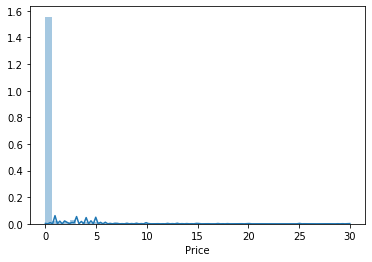

In [58]:
sns.distplot(df['Price'])

(array([9.062e+03, 1.780e+02, 2.800e+01, 2.800e+01, 1.700e+01, 7.000e+00,
        7.000e+00, 0.000e+00, 5.000e+00, 6.000e+00]),
 array([ 0.   ,  2.999,  5.998,  8.997, 11.996, 14.995, 17.994, 20.993,
        23.992, 26.991, 29.99 ]),
 <a list of 10 Patch objects>)

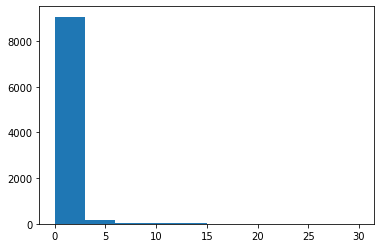

In [59]:
plt.hist(df["Price"])

__b. Reviews column__
__i. Make suitable plot__
__ii. Limit data to apps with < 1 Million reviews

In [60]:
df["Reviews"].value_counts()

2         81
3         78
5         74
4         73
1         67
          ..
624924     1
33053      1
4383       1
43296      1
739329     1
Name: Reviews, Length: 5988, dtype: int64

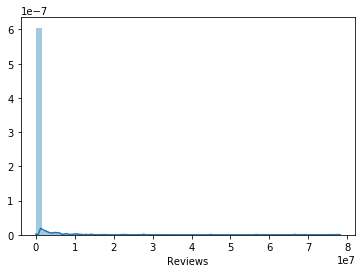

In [61]:
sns.distplot(df['Reviews'])

(array([9.212e+03, 8.100e+01, 1.900e+01, 9.000e+00, 0.000e+00, 5.000e+00,
        0.000e+00, 3.000e+00, 7.000e+00, 2.000e+00]),
 array([1.00000000e+00, 7.81583150e+06, 1.56316620e+07, 2.34474925e+07,
        3.12633230e+07, 3.90791535e+07, 4.68949840e+07, 5.47108145e+07,
        6.25266450e+07, 7.03424755e+07, 7.81583060e+07]),
 <a list of 10 Patch objects>)

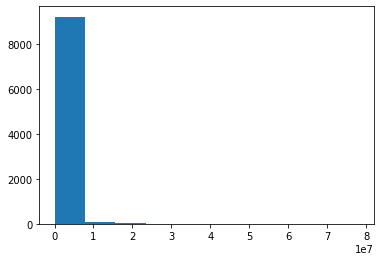

In [62]:
plt.hist(df["Reviews"])

In [63]:
df[df["Reviews"] > 1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.529524,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,21516.529524,10000000,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,21516.529524,50000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,21516.529524,50000000,Free,0.0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000.000000,10000000,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


In [64]:
df.drop(df[df["Reviews"] > 1000000].index, inplace=True)

In [65]:
len(df)

8634

In [66]:
df[df["Reviews"] > 1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


__c. Installs
i. What is the 95th percentile of the installs?
ii. Drop records having a value more than the 95th percentile__

In [67]:
df["Installs"].quantile(0.95)

10000000.0

In [68]:
df["Installs"].value_counts()

1000000       1577
10000000      1177
100000        1149
10000         1004
5000000        752
1000           704
500000         538
50000          466
5000           429
100            307
500            201
50000000       138
10              67
50              56
100000000       51
5                8
1000000000       5
500000000        5
Name: Installs, dtype: int64

In [69]:
df[df["Installs"] > 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,21516.529524,50000000,Free,0.0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,21516.529524,50000000,Free,0.0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
225,Secure Folder,BUSINESS,3.8,14760,8600.000000,50000000,Free,0.0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27000.000000,50000000,Free,0.0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54000.000000,50000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21000.000000,50000000,Free,0.0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up
10549,Toy Truck Rally 3D,GAME,4.0,301895,25000.000000,50000000,Free,0.0,Everyone,Racing,"May 23, 2018",1.4.4,4.1 and up


In [70]:
df.drop(df[df["Installs"] > 10000000].index, inplace=True)

In [71]:
len(df)

8435

In [72]:
df[df["Installs"] > 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [73]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


# Data analysis to answer business questions 

 __5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower__

a. How do you explain this?
b. What is the implication of this on your analysis?

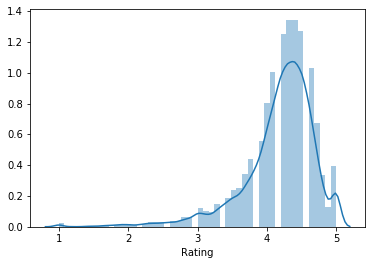

In [74]:
sns.distplot(df["Rating"])

# Skewed towards Higher values

# 6.What are the top Content Rating values?

a. Are there any values with very few records?
b. If yes, drop those as they won’t help in the analysis

In [75]:
df["Content Rating"].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [76]:
df[(df["Content Rating"] == "Adults only 18+") | (df["Content Rating"] == "Unrated")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900.000000,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000.000000,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,21516.529524,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device
8266,DC Universe Online Map,TOOLS,4.1,1186,6400.000000,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [77]:
df.drop(df[(df["Content Rating"] == "Adults only 18+") | (df["Content Rating"] == "Unrated")].index, inplace=True)

In [78]:
len(df)

8431

# 7. Effect of size on rating

__a. Make a joinplot to understand the effect of size on rating__

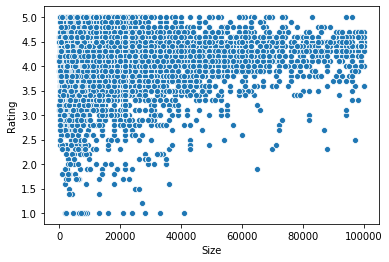

In [79]:
sns.scatterplot(df["Size"], df["Rating"])

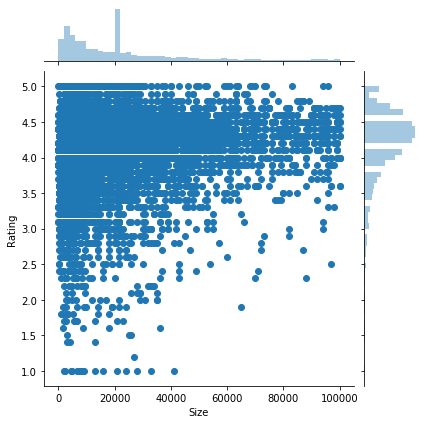

In [80]:
sns.jointplot(df["Size"], df["Rating"])

__b. Do you see any patterns?__

# Good Rating upto size around 30000

# 8. Effect of price on rating

a. Make a jointplot (with regression line)
b. What pattern do you see?
c. How do you explain the pattern?

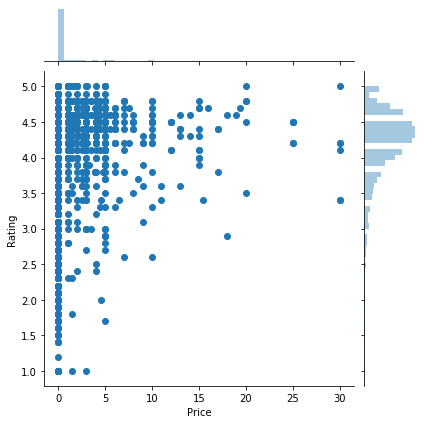

In [81]:
sns.jointplot(df["Price"], df["Rating"])

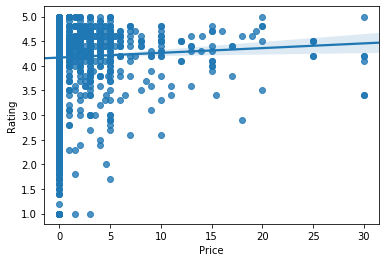

In [82]:
sns.regplot(df["Price"], df["Rating"])

# Most of the apps have most rating with 4.5 with price between $ 0-5 

__d. Replot the data, this time with only records with price > 0__

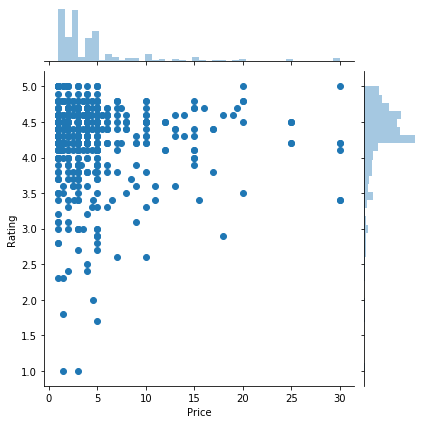

In [83]:
sns.jointplot(df[df["Price"]>0]["Price"], df[df["Price"]>0]["Rating"])

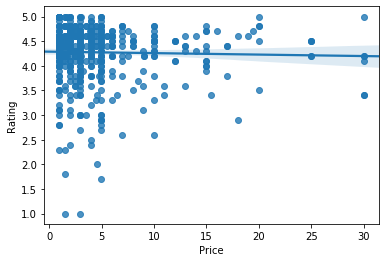

In [84]:
sns.regplot(df[df["Price"]>0]["Price"], df[df["Price"]>0]["Rating"])

__e. Does the pattern change?__
__f. What is your overall inference on the effect of price on the rating__

# As price increases rating decreases

# 9. Look at all the numeric interactions together.

__a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'__

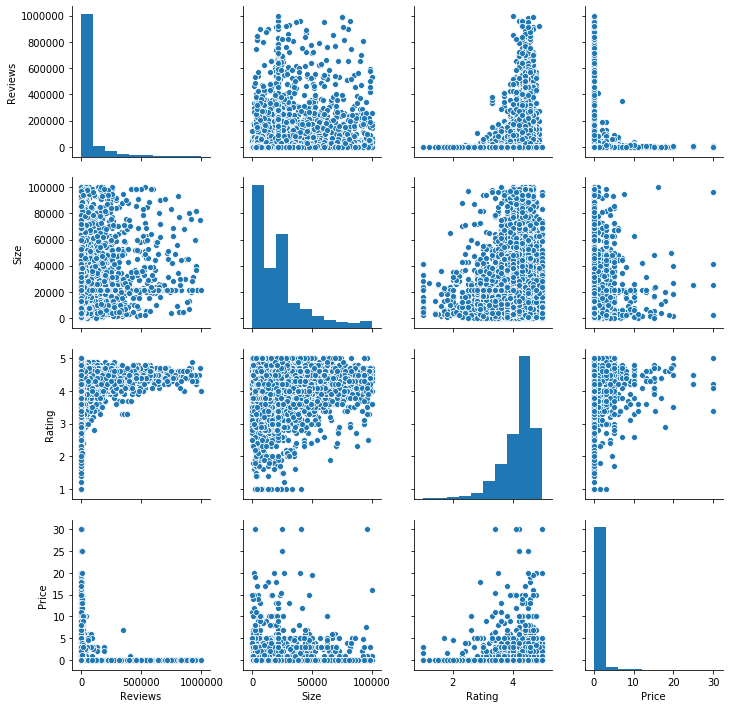

In [85]:
sns.pairplot(df[['Reviews', 'Size', 'Rating', 'Price']])

# 10. Rating vs. content rating

__a. Make a bar plot displaying the rating for each content rating__

In [86]:
df.groupby(df["Content Rating"])['Rating'].count()

Content Rating
Everyone        6782
Everyone 10+     332
Mature 17+       417
Teen             900
Name: Rating, dtype: int64

In [87]:
df.groupby(df["Content Rating"])['Rating'].value_counts()

Content Rating  Rating
Everyone        4.4       736
                4.3       721
                4.5       696
                4.2       645
                4.6       579
                         ... 
Teen            3.1         4
                2.4         2
                2.0         1
                2.3         1
                2.9         1
Name: Rating, Length: 115, dtype: int64

b. Which metric would you use? Mean? Median? Some other quantile?
c. Choose the right metric and plot

In [88]:
df.groupby(df["Content Rating"])['Rating'].mean()

Content Rating
Everyone        4.169242
Everyone 10+    4.218675
Mature 17+      4.099760
Teen            4.197444
Name: Rating, dtype: float64

In [89]:
df.groupby(df["Content Rating"])['Rating'].median()

Content Rating
Everyone        4.3
Everyone 10+    4.3
Mature 17+      4.2
Teen            4.2
Name: Rating, dtype: float64

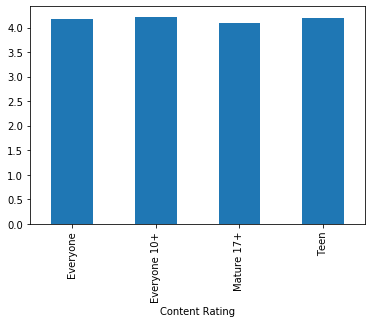

In [90]:
(df.groupby(df["Content Rating"])['Rating'].mean()).plot.bar()

# 11. Content rating vs. size vs. rating – 3 variables at a time

__a. Create 5 buckets (20% records in each) based on Size__

In [94]:
df['bucket'] = pd.qcut(df['Size'],q=5)

In [95]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,bucket
5074,Gun Strike Shoot,GAME,4.1,94761,17000.000000,10000000,Free,0.0,Teen,Action,"February 21, 2017",1.1.4,2.3 and up,"(12000.0, 21516.53]"
7001,Sandbox Number Coloring Book Art - Color By Nu...,FAMILY,4.2,14356,21516.529524,1000000,Free,0.0,Everyone,Entertainment;Brain Games,"March 9, 2018",2.5,4.1 and up,"(12000.0, 21516.53]"
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,21516.529524,1000000,Free,0.0,Everyone,Business,"May 4, 2018",Varies with device,Varies with device,"(12000.0, 21516.53]"
1127,Stock Quote,FINANCE,4.1,4344,4500.000000,500000,Free,0.0,Everyone,Finance,"July 30, 2018",3.6.2,4.0 and up,"(8.499, 4600.0]"
4095,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37000.000000,5000000,Free,0.0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up,"(32000.0, 100000.0]"
7820,NetClient CS,BUSINESS,3.5,125,4300.000000,10000,Free,0.0,Everyone,Business,"January 5, 2018",1.2.2,3.0 and up,"(8.499, 4600.0]"
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.000000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,"(12000.0, 21516.53]"
4385,N Launcher - Nougat 7.0,PERSONALIZATION,4.4,32597,8400.000000,1000000,Free,0.0,Everyone,Personalization,"May 24, 2018",1.5.2,4.1 and up,"(4600.0, 12000.0]"
2304,MyChart,MEDICAL,4.2,19473,21516.529524,1000000,Free,0.0,Everyone,Medical,"July 24, 2018",Varies with device,Varies with device,"(12000.0, 21516.53]"
9474,Pregnant Mom Surgery Newborn Twins Baby Birth ...,FAMILY,4.3,95,28000.000000,10000,Free,0.0,Teen,Educational,"February 24, 2018",1.0,4.1 and up,"(21516.53, 32000.0]"


In [97]:
df.pivot_table(values = 'Rating',index = 'bucket',columns = 'Content Rating',aggfunc=lambda x:np.quantile(x,0.2))

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
bucket,,,,
"(8.499, 4600.0]",3.8,3.84,3.28,3.84
"(4600.0, 12000.0]",3.8,3.94,3.64,3.80
"(12000.0, 21516.53]",4.0,4.10,3.70,3.90
"(21516.53, 32000.0]",3.8,4.00,3.90,4.00
"(32000.0, 100000.0]",3.9,4.00,4.00,4.00


__c. Make a heatmap of this
i. Annotated__


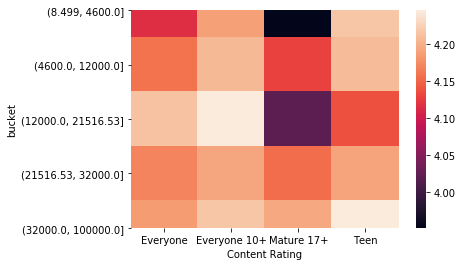

In [98]:
df = df.pivot_table(values = 'Rating',index = 'bucket',columns = 'Content Rating')
sns.heatmap(df);

__ii. Greens color map__

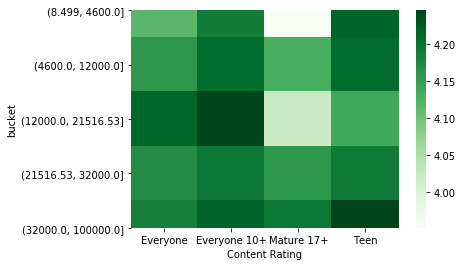

In [99]:
sns.heatmap(df,cmap='Greens')

__d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?__

__Darker color also shows us the values.... So it is not compulsory to use lighter color always__